In [25]:
import pathlib

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

In [17]:
output_dir = pathlib.Path("figures/compartment_drop")

cell_health_dir = pathlib.Path("../../1.calculate-metrics/cell-health/results")
grit_file = pathlib.Path(f"{cell_health_dir}/cell_health_map.tsv")

In [18]:
grit_df = pd.read_csv(grit_file, sep="\t")
grit_df

,Metadata_gene_name,Metadata_pert_name,mean_ap,p_value,n_pos_pairs,n_total_pairs,cell_line,barcode_control
0,AKT1,AKT1-1,0.236639,0.123396,11.0,203.0,HCC44,cutting_control
1,AKT1,AKT1-2,0.198102,0.148055,11.0,203.0,HCC44,cutting_control
2,ARID1B,ARID1B-1,0.122817,0.166342,11.0,203.0,HCC44,cutting_control
3,ARID1B,ARID1B-2,0.127141,0.141236,11.0,203.0,HCC44,cutting_control
4,ATF4,ATF4-1,0.315895,0.023718,11.0,203.0,HCC44,cutting_control
...,...,...,...,...,...,...,...,...
676,TXN,TXN-2,0.269523,0.051740,11.0,179.0,ES2,perturbation_control
677,XBP,XBP-1,0.359246,0.043196,11.0,179.0,ES2,perturbation_control
678,XBP,XBP-2,0.362530,0.039621,11.0,179.0,ES2,perturbation_control
679,YAP1,YAP1-1,0.745002,0.000730,11.0,179.0,ES2,perturbation_control


In [22]:
# Step 1: Filter grit_df
grit_focus_df = grit_df[
    (grit_df['barcode_control'] == 'cutting_control')
    # (grit_df['cor_method'] == 'pearson')
]

# # Step 2: Merge with rep_df
# grit_focus_df = pd.merge(
#     grit_focus_df, 
#     rep_df, 
#     on=['perturbation', 'group', 'cell_line'], 
#     how='left'
# )

# Step 3: Drop rows with NA values
grit_focus_df.dropna(inplace=True)

grit_focus_df["-log10(p-value)"] = -1 * np.log10(grit_focus_df["p_value"])

# Display the first few rows
print(grit_focus_df.head())

  Metadata_gene_name Metadata_pert_name   mean_ap   p_value  n_pos_pairs  \
0               AKT1             AKT1-1  0.236639  0.123396         11.0   
1               AKT1             AKT1-2  0.198102  0.148055         11.0   
2             ARID1B           ARID1B-1  0.122817  0.166342         11.0   
3             ARID1B           ARID1B-2  0.127141  0.141236         11.0   
4               ATF4             ATF4-1  0.315895  0.023718         11.0   

   n_total_pairs cell_line  barcode_control  -log10(p-value)  
0          203.0     HCC44  cutting_control         0.908699  
1          203.0     HCC44  cutting_control         0.829576  
2          203.0     HCC44  cutting_control         0.778999  
3          203.0     HCC44  cutting_control         0.850055  
4          203.0     HCC44  cutting_control         1.624929  


/tmp/ipykernel_46876/655699876.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_46876/655699876.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


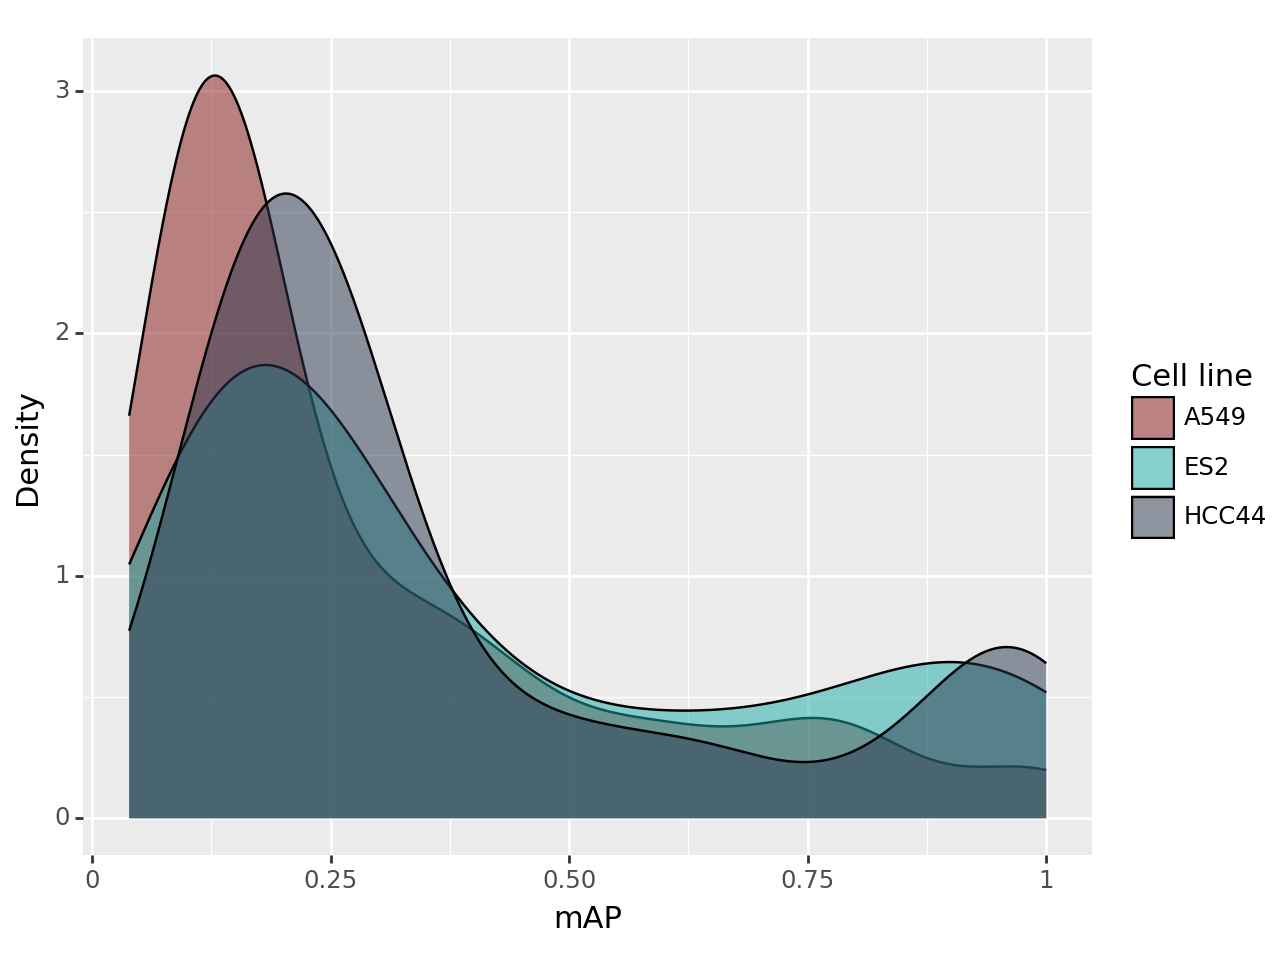

<Figure Size: (640 x 480)>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_density, scale_fill_manual, labs, xlab, ylab, theme

cell_line_colors = {"A549": "#861613", "ES2": "#1CADA8", "HCC44": "#2A364D"}

# Assuming `grit_focus_df` and `mean_grit_df` are already defined as Pandas DataFrames
# Also assuming `cell_line_colors` is a dictionary mapping cell lines to color codes

# Define your custom theme
# custom_grit_theme = theme(...)  # Define this based on your original 'custom_grit_theme'

# Create the main plot
mean_grit_gg = (
    ggplot(grit_focus_df, aes(x='mean_ap', fill='cell_line'))
    + geom_density(alpha=0.5)
    + scale_fill_manual(name="Cell line", values=cell_line_colors)
    + xlab("mAP")
    + ylab("Density")
    # + custom_grit_theme
    # + labs(tag="b")
)

# Plot the chart using matplotlib to add the table
# fig, ax = plt.subplots()
# ax = mean_grit_gg.draw()
# # table = ax.table(cellText=mean_grit_df.values, colLabels=mean_grit_df.columns, loc='top')
# table.auto_set_font_size(False)
# table.set_fontsize(10)
# table.scale(1, 1.5)
# plt.show()

mean_grit_gg


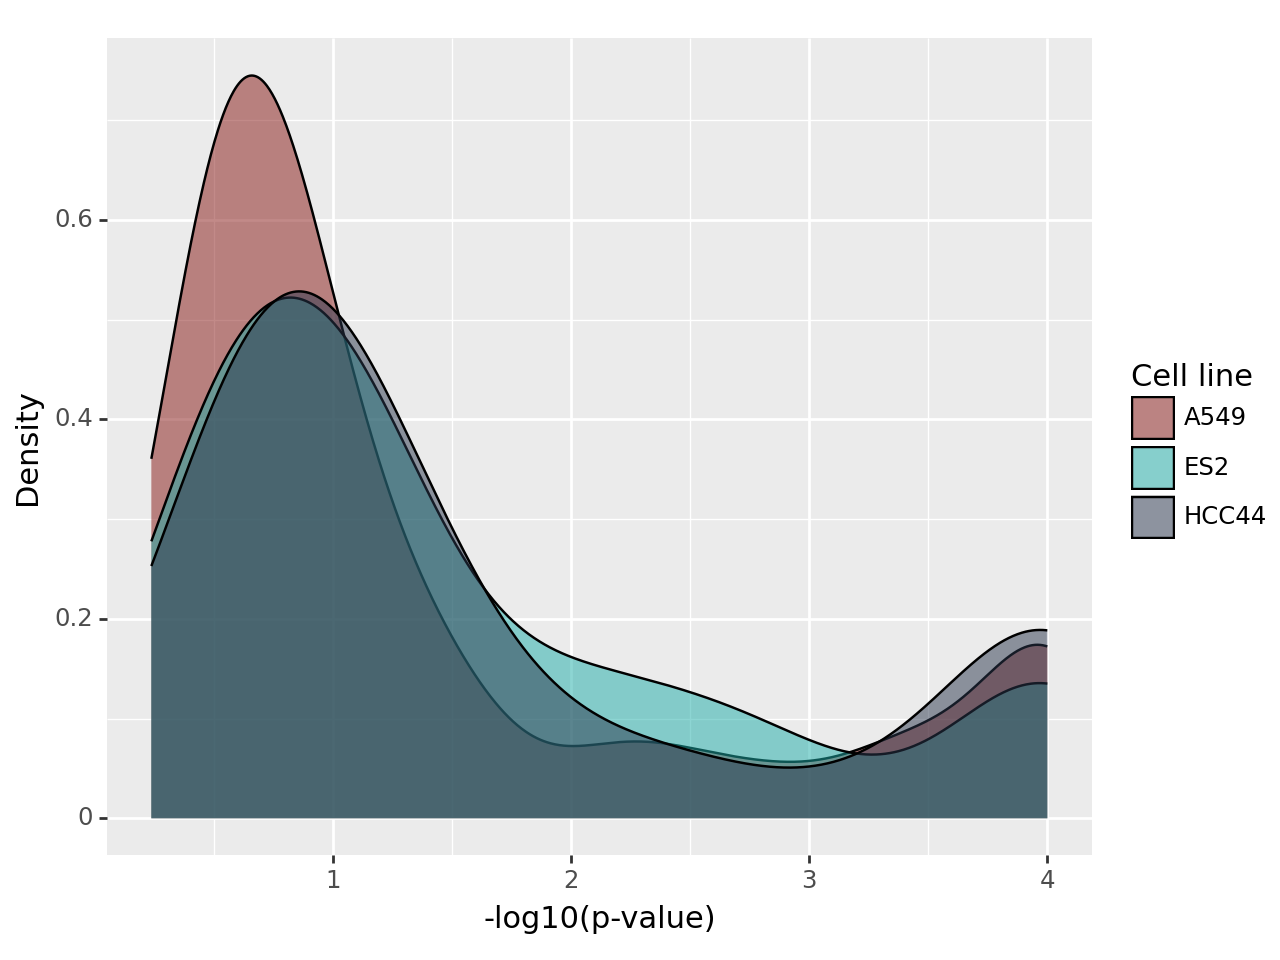

<Figure Size: (640 x 480)>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_density, scale_fill_manual, labs, xlab, ylab, theme

cell_line_colors = {"A549": "#861613", "ES2": "#1CADA8", "HCC44": "#2A364D"}

# Assuming `grit_focus_df` and `mean_grit_df` are already defined as Pandas DataFrames
# Also assuming `cell_line_colors` is a dictionary mapping cell lines to color codes

# Define your custom theme
# custom_grit_theme = theme(...)  # Define this based on your original 'custom_grit_theme'

# Create the main plot
mean_grit_gg = (
    ggplot(grit_focus_df, aes(x='-log10(p-value)', fill='cell_line'))
    + geom_density(alpha=0.5)
    + scale_fill_manual(name="Cell line", values=cell_line_colors)
    + xlab("-log10(p-value)")
    + ylab("Density")
    # + custom_grit_theme
    # + labs(tag="b")
)

# Plot the chart using matplotlib to add the table
# fig, ax = plt.subplots()
# ax = mean_grit_gg.draw()
# # table = ax.table(cellText=mean_grit_df.values, colLabels=mean_grit_df.columns, loc='top')
# table.auto_set_font_size(False)
# table.set_fontsize(10)
# table.scale(1, 1.5)
# plt.show()

mean_grit_gg


In [32]:
df[df['cell_line'] == 'ES2']

,Metadata_gene_name,Metadata_pert_name,mean_ap,p_value,n_pos_pairs,n_total_pairs,cell_line,barcode_control,-log10(p-value),mAP,p < 0.05
454,AKT1,AKT1-1,0.117926,0.350332,11.0,203.0,ES2,cutting_control,0.455521,0.117926,False
455,AKT1,AKT1-2,0.102132,0.414719,11.0,203.0,ES2,cutting_control,0.382247,0.102132,False
456,ARID1B,ARID1B-1,0.130244,0.177824,11.0,203.0,ES2,cutting_control,0.750010,0.130244,False
457,ARID1B,ARID1B-2,0.120247,0.201910,11.0,203.0,ES2,cutting_control,0.694843,0.120247,False
458,ATF4,ATF4-1,0.365777,0.002760,11.0,203.0,ES2,cutting_control,2.559134,0.365777,True
...,...,...,...,...,...,...,...,...,...,...,...
558,TXN,TXN-2,0.155995,0.095363,11.0,203.0,ES2,cutting_control,1.020619,0.155995,False
559,XBP,XBP-1,0.324488,0.089808,11.0,203.0,ES2,cutting_control,1.046687,0.324488,False
560,XBP,XBP-2,0.362833,0.012099,11.0,203.0,ES2,cutting_control,1.917258,0.362833,True
561,YAP1,YAP1-1,0.679973,0.000900,11.0,203.0,ES2,cutting_control,3.045801,0.679973,True


/tmp/ipykernel_46876/232587381.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_46876/232587381.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


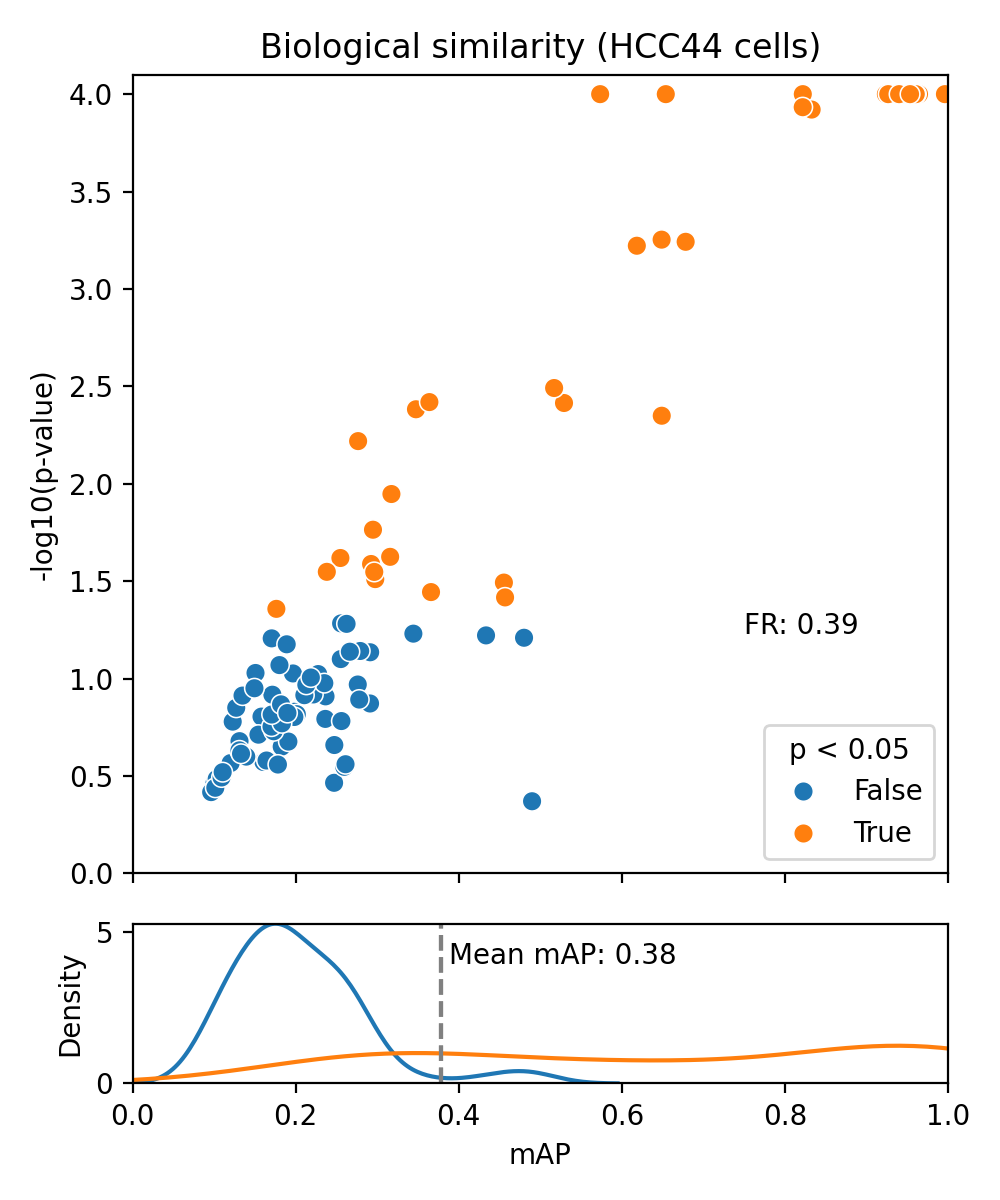

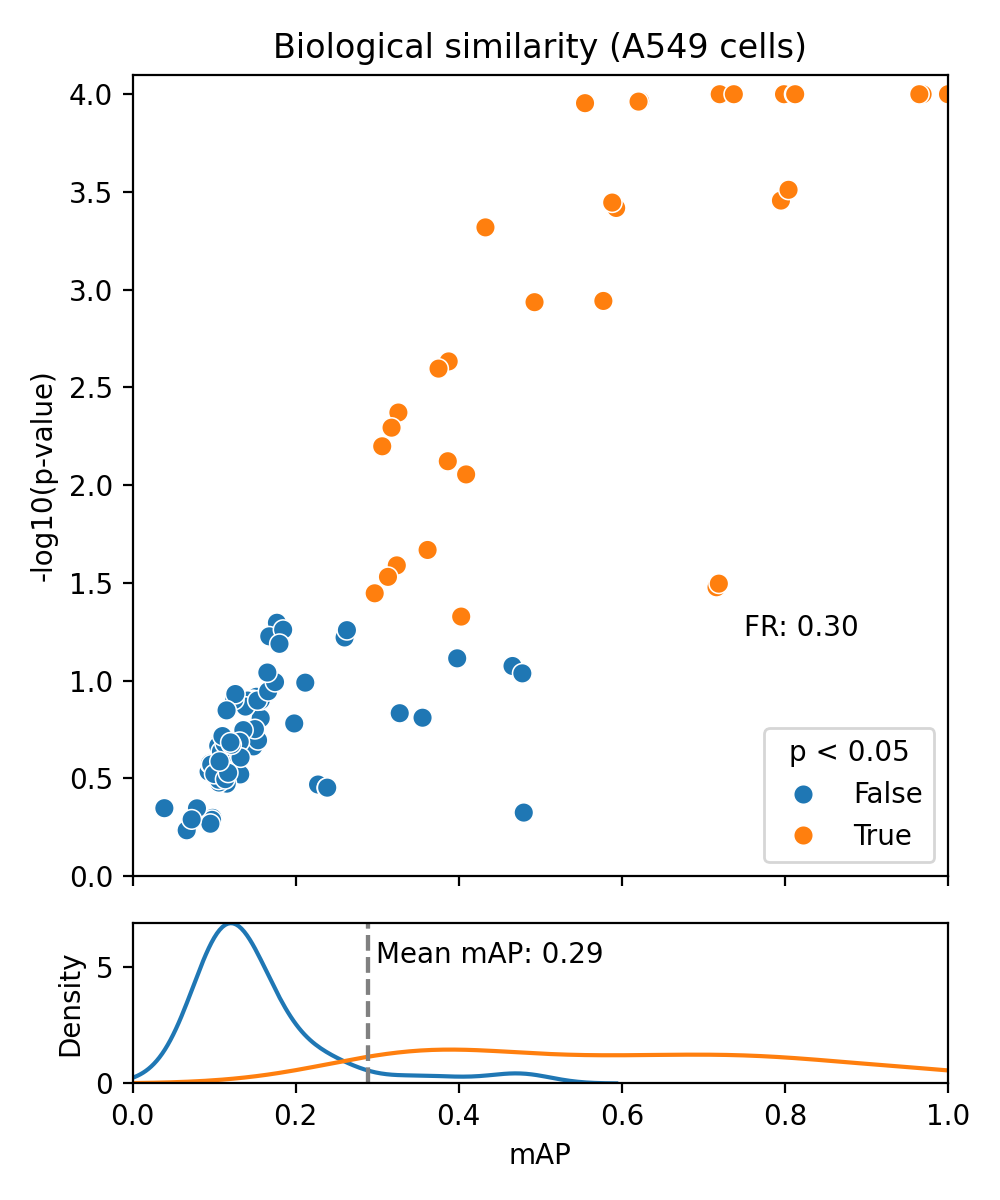

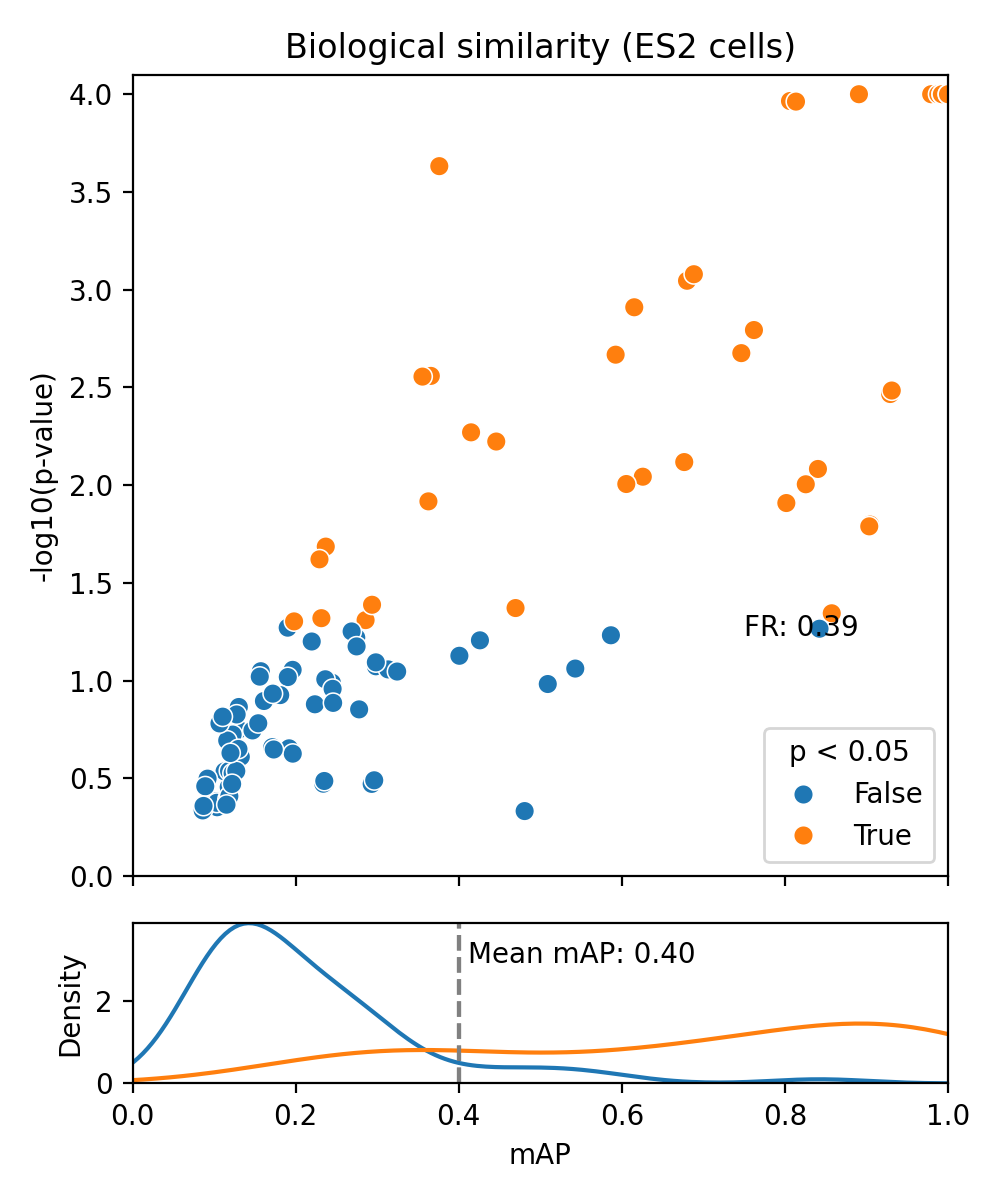

In [36]:
# df = grit_focus_df

grit_focus_df["mAP"] = grit_focus_df["mean_ap"]
grit_focus_df["p < 0.05"] = grit_focus_df["p_value"] < 0.05

def remove_inner_ticklabels(fig: plt.Figure):
    """
    Remove inner ticklabels from a figure.

    Parameters
    ----------
    fig : matplotlib.figure.Figure
        Figure to remove inner ticklabels from.
    """
    for ax in fig.axes:
        try:
            ax.label_outer()
        except AttributeError:
            pass


for cell_line in grit_focus_df['cell_line'].unique():

    df = grit_focus_df[grit_focus_df["cell_line"] == cell_line]

    fig, axes = plt.subplots(2, 1, figsize=(5, 6), gridspec_kw={'height_ratios': [5, 1]})

    mean_map = df['mAP'].mean()
    fr = df['p < 0.05'].mean()
    sns.scatterplot(
        ax=axes[0], 
        data=df, 
        x='mAP', 
        y='-log10(p-value)', 
        hue='p < 0.05',
        s=50
    )
    axes[0].set_title(f"Biological similarity ({cell_line} cells)")
    axes[0].text(0.8, 0.01, f"FR: {fr:.2f}", transform=axes[0].transAxes)

    axes[0].set_xlabel("")
    axes[0].set_ylim(0, max(df['-log10(p-value)'])+0.1)
    sns.move_legend(axes[0], "upper left")

    # Second Row: KDE plots
    max_kde_y = 0
    mean_map = df['mAP'].mean()
    for p_value in df['p < 0.05'].unique():
        ax = sns.kdeplot(
            ax=axes[1],
            data=df[df['p < 0.05'] == p_value],
            x='mAP', 
            label=str(p_value)
        )
        max_kde_y = max(max_kde_y, max(ax.lines[-1].get_ydata()))
        axes[1].axvline(mean_map, color='grey', linestyle='--')
    # axes[1].set_ylabel("")
    axes[1].set_ylim(0, max_kde_y)
    axes[1].text(mean_map+0.01, 0.75, f"Mean mAP: {mean_map:.2f}", transform=axes[1].transAxes)

    for ax in axes.flat:
        ax.set_xlim(0, 1)  # Set x-axis limit to 0-1 for all subplots

    remove_inner_ticklabels(fig)
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_46876/4076272895.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


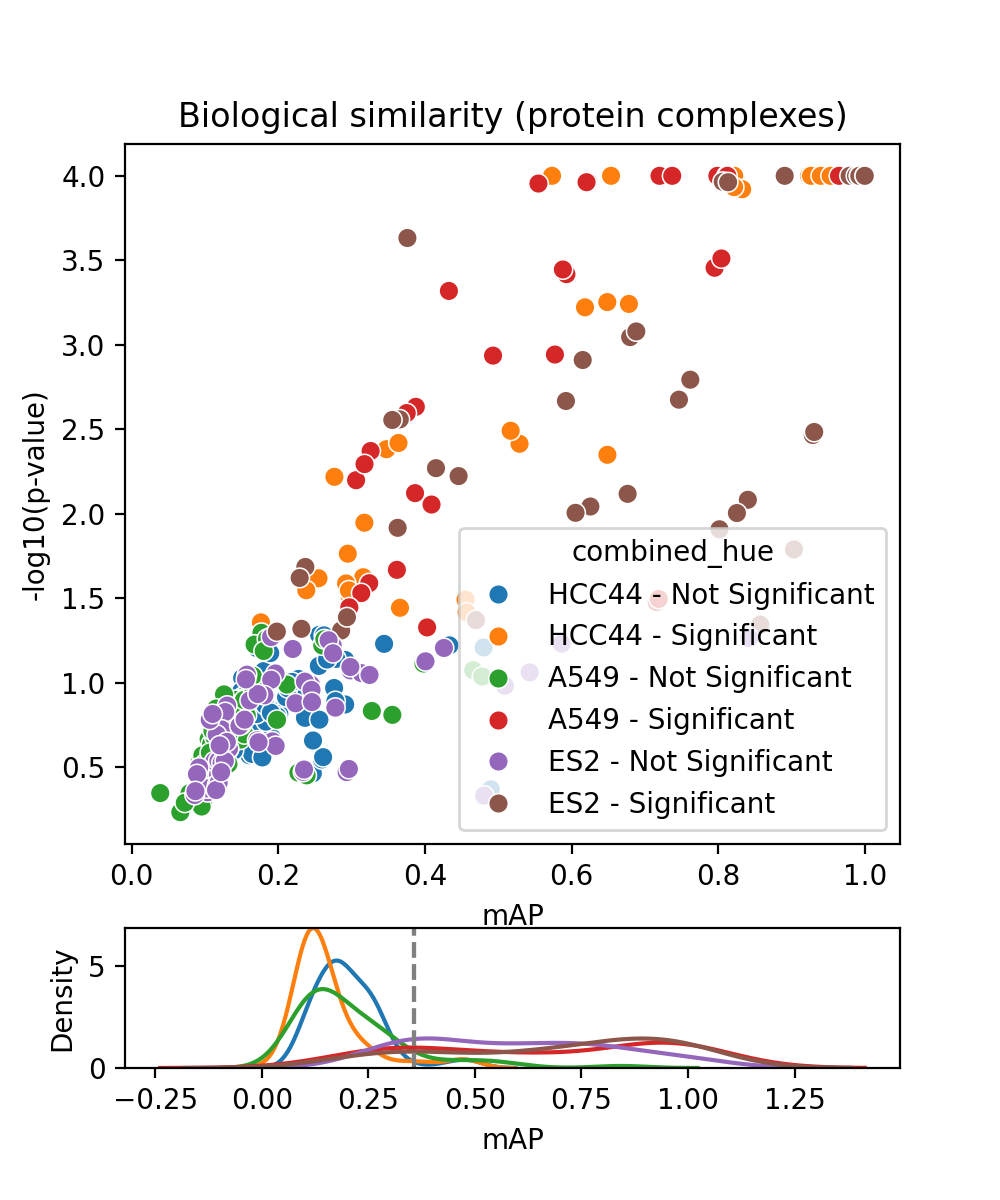

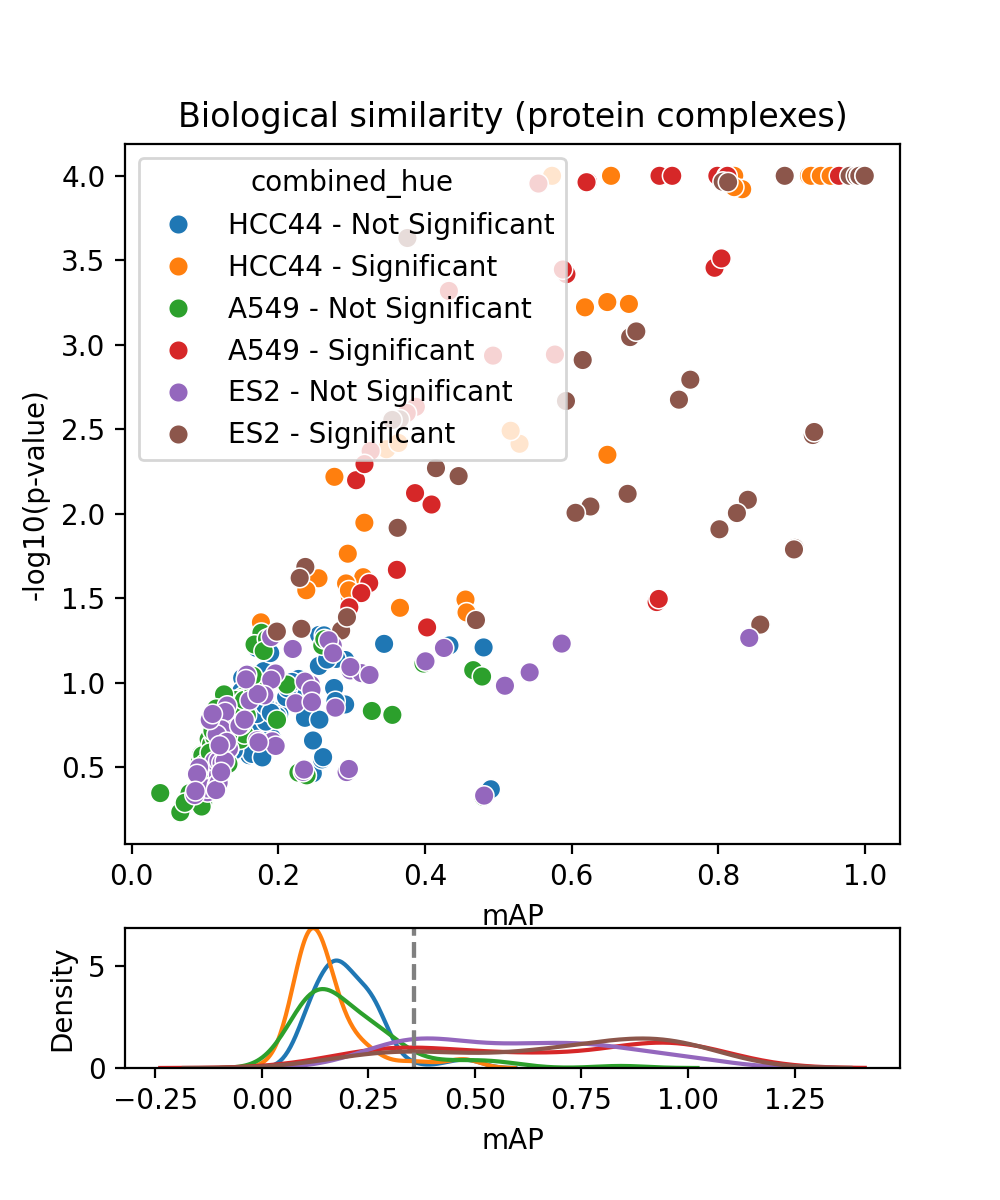

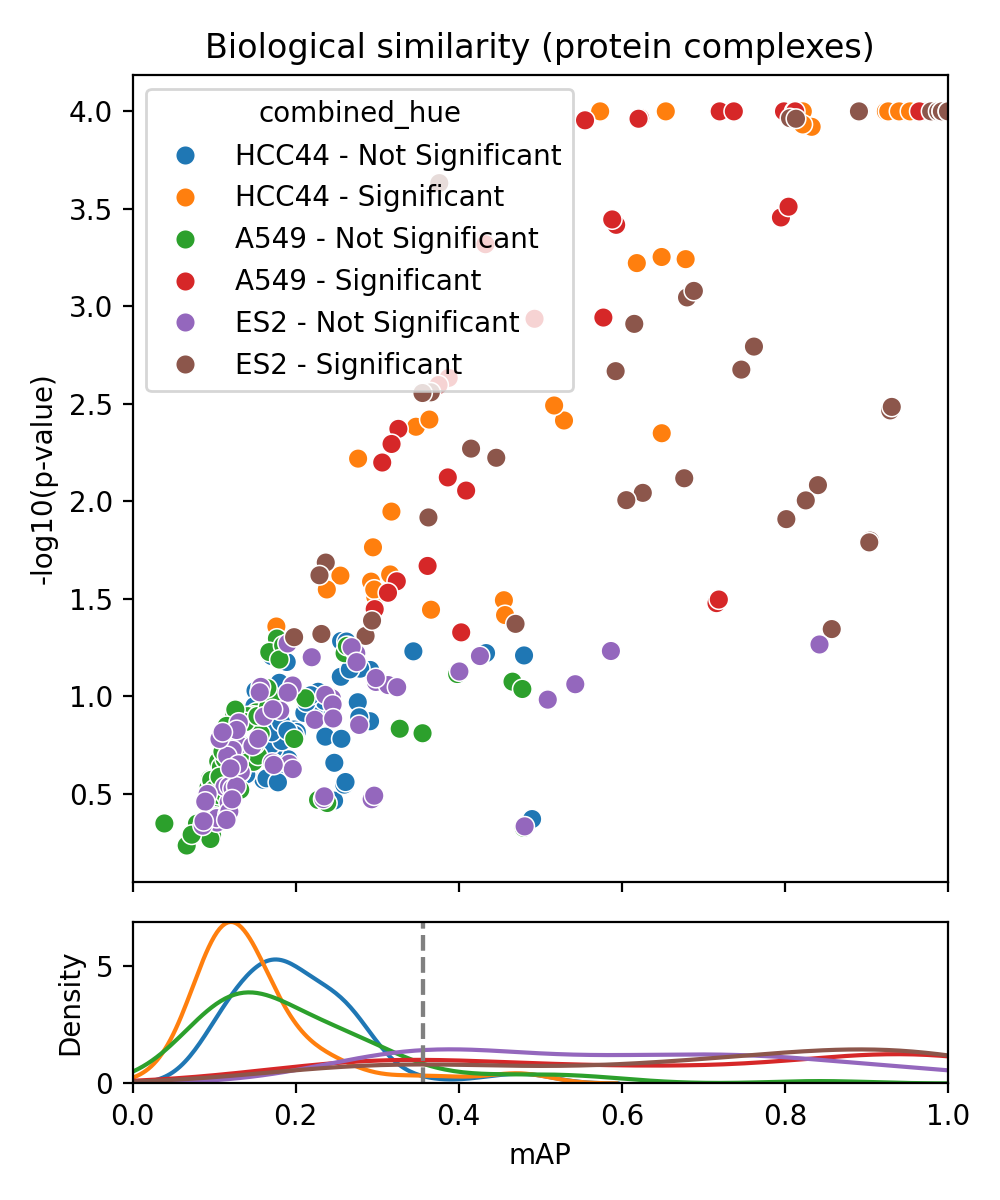

In [41]:


# Assuming df is your DataFrame
df = grit_focus_df

# Create a new column for combined hue
df['combined_hue'] = df.apply(lambda x: f"{x['cell_line']} - {'Significant' if x['p < 0.05'] else 'Not Significant'}", axis=1)



fig, axes = plt.subplots(2, 1, figsize=(5, 6), gridspec_kw={'height_ratios': [5, 1]})

mean_map = df['mAP'].mean()
sns.scatterplot(
    ax=axes[0], 
    data=df, 
    x='mAP', 
    y='-log10(p-value)', 
    hue='combined_hue',
    s=50
)
axes[0].set_title("Biological similarity (protein complexes)")
# sns.move_legend(axes[0], "lower right")

# Second Row: KDE plots
max_kde_y = 0
for p_value in df['p < 0.05'].unique():
    for cell_line in df['cell_line'].unique():
        filtered_df = df[(df['p < 0.05'] == p_value) & (df['cell_line'] == cell_line)]
        sns.kdeplot(
            ax=axes[1],
            data=filtered_df,
            x='mAP',
            label=f"{cell_line} - {'Significant' if p_value else 'Not Significant'}"
        )
        max_kde_y = max(max_kde_y, max(axes[1].lines[-1].get_ydata()))
    axes[1].axvline(mean_map, color='grey', linestyle='--')

axes[1].set_ylim(0, max_kde_y)
# sns.move_legend(axes[1], "upper left")

for ax in axes.flat:
    ax.set_xlim(0, 1)  # Set x-axis limit to 0-1 for all subplots

remove_inner_ticklabels(fig)
plt.tight_layout()
plt.show()
